# Machine Learning
## 1. Modelo: Árbol de decisión
Ejemplo extraído de siguiente link:
https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ejemplo-de-arbol-de-decision

Volvamos probar el clasificador basado en árbol de decisión de Scikit-Learn con el dataset Iris:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris["label"] = iris.species.astype("category").cat.codes  # transformamos la columna species en una nueva columna numérica
                                                           # "label"
iris

,sepal_length,sepal_width,petal_length,petal_width,species,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Para poder observa las fronteras de decisión, estamos codificando la etiqueta de salida a una valor numérico pese a que la implementación del árbol de decisión de Scikit-Learn permite su entrenamiento usando como etiquetas valores no numéricos. Por el mismo motivo (para ver las fronteras en dos dimensiones), entrenaremos nuestro modelo con solo dos características.

In [ ]:
X = iris[["sepal_length", "sepal_width"]]  #  seleccionamos solo 2 características numéricas
y = iris.label

Importamos la clase **DecisionTreeClassifier**, la instanciamos y entrenamos el modelo:

Mas información sobre árboles de decisión para regresión:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X.values, y)

DecisionTreeClassifier()

Visualicemos las fronteras de decisión:

Mas información sobre estas funciones:
https://interactivechaos.com/es/manual/tutorial-de-machine-learning/libreria-boundaries

In [ ]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(["#E67332", "#18B95E", "#326DE6"])

def plot_decision_boundaries(model, X, ax):
    """Muestra las fronteras de decisión de un modelo de clasificación:
    * model: Modelo entrenado
    * X: Array NumPy conteniendo las muestras sobre las que realizar la predicción
    * ax: Conjunto de ejes de matplotlib en el que mostrar el resultado
    """
    minX = min(X[:, 0])
    maxX = max(X[:, 0])
    minY = min(X[:, 1])
    maxY = max(X[:, 1])
    marginX = (maxX - minX) * 0.1
    marginY = (maxY - minY) * 0.1
    x = np.linspace(minX - marginX, maxX + marginX, 1000)
    y = np.linspace(minY - marginY, maxY + marginY, 1000)
    X, Y = np.meshgrid(x, y)
    Z = model.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
    ax.contourf(X, Y, Z, levels = 2,
        colors = ["#E3BCAB", "#B0D9CB", "#75B6E6"],
        zorder = 0
    )

def show_boundaries(model, X_train = None, X_test = None, y_train = None, y_test = None, labels = [], show = True):
    """Muestra las fronteras de decisión de un modelo de clasificación y,
    sobre él, las muestras de entrenamiento y de validación:
    * model: Modelo entrenado
    * X_train: Array NumPy conteniendo las características de entrenamiento
    * X_test: Array NumPy conteniendo las características de validación
    * y_train: Array NumPy conteniendo las etiquetas de entrenamiento
    * y_test: Array NumPy conteniendo las etiquetas de validación
    * labels: Array NumPy conteniendo los identificadores de las clases
    """
    fig, ax = plt.subplots(figsize = (7, 7))
    ax.set_aspect("equal")
    if model != None:
        plot_decision_boundaries(model, X_train, ax)
    # Train dataset
    scatter = plt.scatter(
        x = X_train[:, 0], y = X_train[:, 1], c = y_train,
        cmap = colors, zorder = 2, edgecolor = "#666666"
    )
    # Test dataset
    if not(X_test is None):
        scatter = plt.scatter(
            x = X_test[:, 0], y = X_test[:, 1], c = y_test,
            cmap = colors, zorder = 2, edgecolor = "#FFFFFF"
        )
    ax.legend(
        handles = scatter.legend_elements()[0],
        labels = list(labels)
    )

    ax.grid(color = "#EEEEEE", zorder = 1, alpha = 0.4)
    if show:
        plt.show()
    else:
        return fig, ax

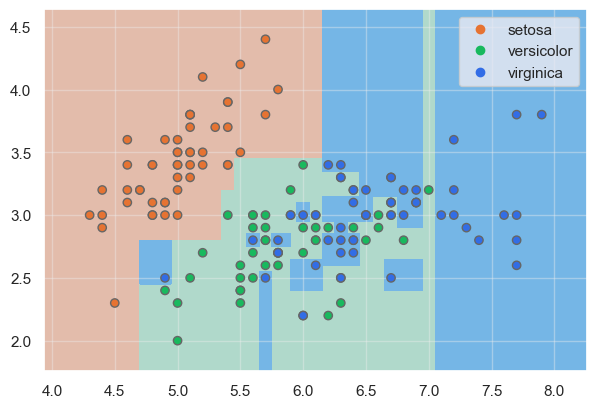

In [ ]:
show_boundaries(model, X.values, None, y, None, iris.species.unique())

El algoritmo claramente ha sido sobreentrenado. Podemos visualizar el árbol usando la función plot_tree() que se encuentra en la misma librería:

In [ ]:
from sklearn.tree import plot_tree

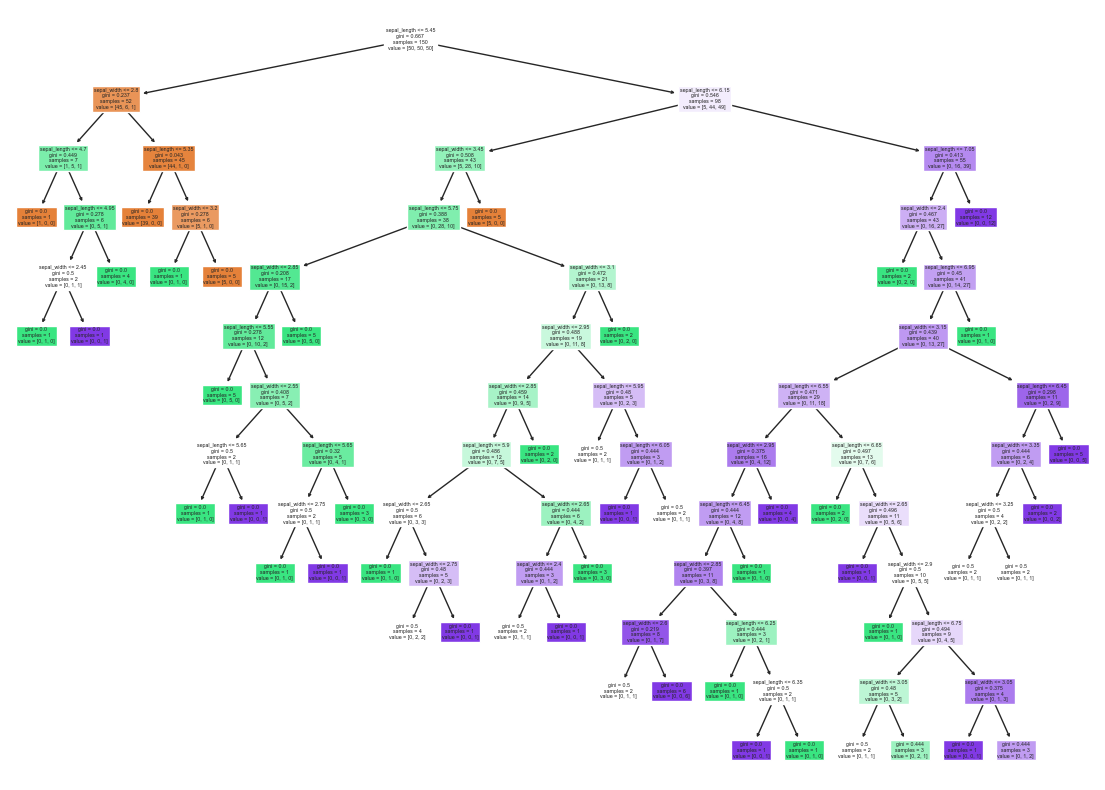

In [ ]:
fig, ax = plt.subplots(figsize = (14, 10))
plot_tree(model, filled = True, feature_names = X.columns)
plt.show()

## 2. Regularización en árboles de decisión
Por defecto, un árbol de decisión siempre va a tender de una forma natural a sobreentrenarse, pues continuará dividiendo los datos hasta que la pureza de todos los grupos sea máxima. Para evitar el sobreentrenamiento y mejorar la generalización del resultado obtenido, existen varios métodos, accesibles a través de los siguientes parámetros en la implementación de Scikit-Learn:

* **max_depth o Profundidad del árbol**: limitando la profundidad del árbol conseguimos que la división de las muestras sea más fácilmente generalizable.
* **min_samples_split o Número mínimo de muestras requerido para dividir un nodo:** Si un nodo no contiene el número de muestras mínimo especificado, no podrá ser dividido, limitando también de este modo el sobreentrenamiento.
* **min_samples_left o Número mínimo de muestras por hoja:** si una división implica separar el número de muestras de un nodo de forma que en uno de los nodos hijo no se alcance el valor mínimo establecido de muestras, no se permitirá la división.
* **max_leaf_nodes o Número máximo de hojas:** También es posible limitar el número de hojas a crear en el árbol, lo que lleva a modelos más generalizables.
* **min_impurity_split o Mínimo de impureza para dividir un nodo:** si la impureza de un nodo no alcanza el valor mínimo, no se permitirá su división.

Otros parámetros de la implementación de Scikit-Learn son:

* **criterion:** función de impureza a usar (por defecto, Gini).
* **splitter:** estrategia a usar para decidir el criterio de división de un nodo (es decir, para escoger qué característica y qué umbral usar).
* **class_weight:** pesos asociados a las clases. Si se omite, se supone que todas las clases tienen igual peso.
* **random_state:** semilla del generador de números pseudo-aleatorios, lo que nos permite entrenar el modelo de forma determinista.

### 2.1 Modelo regularizado
Repitamos el entrenamiento del modelo a partir del dataset Iris limitando la profundidad máxima del árbol:

In [ ]:
X.values.shape  # X tiene los valores las dos columnas seleccionadas "sepal_length" y "sepal_width"

(150, 2)

In [ ]:
y  # Tiene los valores númericos "columna label"

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int8

In [ ]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 0)
model.fit(X.values, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

Veamos las fronteras de decisión de este nuevo modelo:

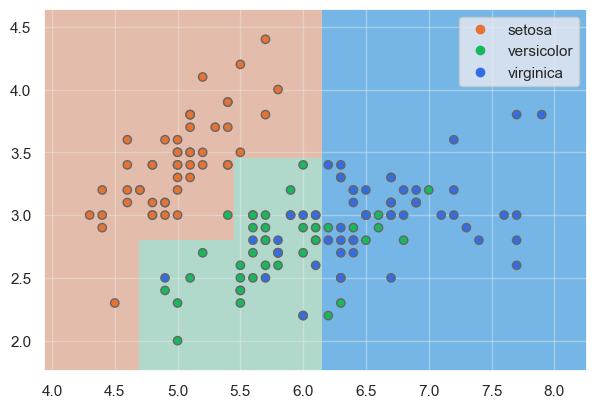

In [ ]:
show_boundaries(model, X.values, None, y, None, iris.species.unique())

Es evidente que hemos reducido el sobreentrenamiento. Mostremos el árbol creado:

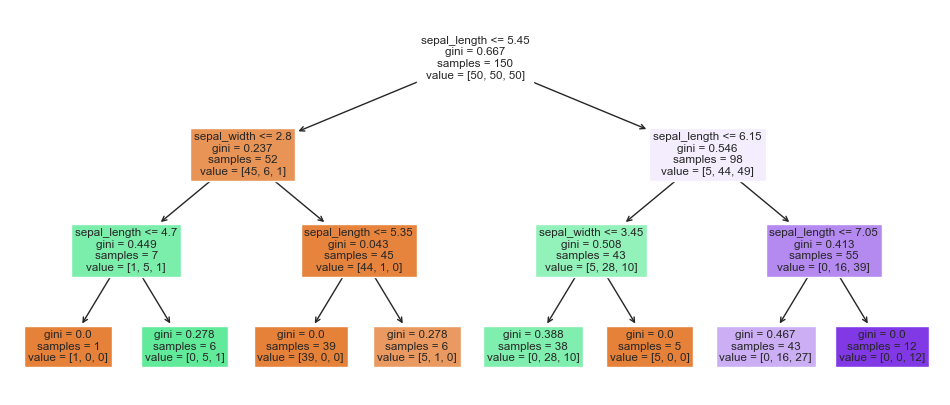

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
plot_tree(model, filled = True, feature_names = X.columns)
plt.show()

#### 2.1.1 Información sobre el entrenamiento
Nodo superior
* En el nodo superior se nos informa de que partimos de un dataset con 150 muestras, de las que 50 pertenecen a la clase 0, 50 a la clase 1 y otras 50 a la clase 2. El fondo blanco de este rectángulo nos indica que no hay ninguna muestra dominante.
* Esta distribución de muestras supone que la impureza de este dataset va a ser la máxima posible. Como, por defecto, la clase DecisionTreeClassifier va a aplicar el índice Gini, podemos calcular nosotros la impureza:

gini = 1 - 0.333333 ** 2 - 0.333333 ** 2 - 0.333333 ** 2 = 0.666667333333

En la parte superior del nodo, se indica cuál ha sido la condición ideal para definir la primera división: si la longitud del sépalo es menor o igual a 5.45.
### 2.2 Exactitud del modelo
Validemos el modelo comprobando su exactitud (número de muestras bien clasificadas). Para ello vamos a dividir el dataset en un bloque de entrenamiento y otro de validación, entrenando el modelo con el primero de ellos:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, random_state = 42)
# Por defaults train_size se establece en en 0,25 (25%).

Ahora podemos ver la exactitud del modelo usando el método **.score()**:

In [ ]:
model.score(X_test, y_test)

0.8421052631578947

Se han clasificado correctamente el 84.2 % de las muestras del dataset de prueba.
### 2.3 Predicciones y probabilidades
Si queremos obtener la predicción para una muestra (o para un conjunto de ellas), no tenemos más que recurrir al método **.predict()**. Por ejemplo, visualicemos la muestra que ocupa el índice 5 del dataset de validación:

In [ ]:
X_testpd = pd.DataFrame(X_test) # lo convertimos en un dataframe de Pandas

In [ ]:
X_testpd.iloc[[5]]

,0,1
5,5.4,3.4


La predicción del modelo es:

In [ ]:
model.predict(X_testpd.iloc[[5]])

array([0], dtype=int8)

Según nuestro modelo, esta muestra pertenece a la clase 0 ¿Y cuál es la probabilidad asociada a esta predicción? Para ello tenemos a nuestra disposición el método **.predict_proba()**:

In [ ]:
model.predict_proba(X_testpd.iloc[[5]])

array([[0.83333333, 0.16666667, 0.        ]])

Según el modelo, hay una probabilidad del 83.33 % de que la muestra pertenezca a la clase 0, un 16.6 % de que pertenezca a la clase 1, y un 0 % de que pertenezca a la clase 2.

Esta información es fácilmente observable a partir del árbol:

![arbol_iris2.JPG](attachment:arbol_iris2.JPG)

* Nuestra muestra tiene una longitud de sépalo de 5.4, por lo que cumple la primera condición y es agrupada en el bloque de la izquierda (nodo de color naranja).
* Nuestra muestra NO cumple la condición planteada por este segundo nodo, ancho del sepalo, por lo que se agrupa en el bloque de la derecha (en naranja).
* Por último, en este nodo se plantea si la longitud del sépalo es o no menor o igual a 5.35, condición que nuestra muestra tampoco cumple, por lo que va a caer en la hoja de la derecha (en naranja).
* En esta hoja se incluyeron 0 muestras de la clase 0, 0 de la clase 1 y 12 de la clase 2, por lo que, al ser la clase 2 dominante, cualquier muestra que llegue a esta hoja recibirá esta clasificación.
* Por último, en esta hoja hay 6 muestras de las cuales 5 son de clase 0, 1 es de la clase 1 y nos hay muestras de la clase 2. La probabilidad estimada de que a esta hoja lleguen muestras de cada clase es:
  * de la clase 0 es 5/6 = 83.3 %.
  * de la clase 1 es 1/6 = 16.6 %.
  * de la calse 2 es 0/6 = 0 %.
### 2.4 Impacto de la profundidad máxima
Podemos observar cuál es el efecto que tiene el fijar una profundidad máxima en el conjunto de datos de entrenamiento y en el de prueba, debemos entrenar varios modelos con profundidades máximas entre 1 y, por ejemplo, 15, y visualizar el porcentaje de acierto en cada caso.

Comenzamos dividiendo el dataset en dos bloques:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, random_state = 0)
# Por defaults train_size se establece en en 0,25 (25%).

Ahora entrenamos los 15 modelos (recordemos que la función range devuelve un generador de números que no incluye el extremo derecho del rango):

In [ ]:
train_scores = []
test_scores = []
for depth in range(1, 16):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

Visualicemos ahora el resultado:

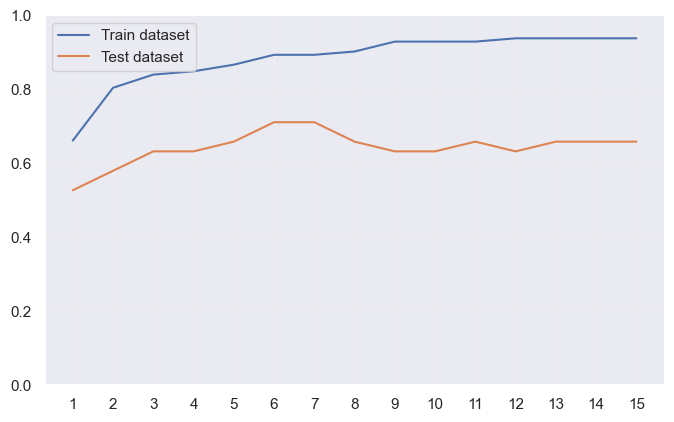

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4.8))
ax.plot(range(1, 16), train_scores, label = "Train dataset")
ax.plot(range(1, 16), test_scores, label = "Test dataset")
ax.set_xticks(range(1, 16), labels = range(1, 16))
ax.grid(color = "#EEEEEE", zorder = 0)
ax.set_ylim(0, 1)
ax.legend()
plt.show()

Comprobamos que, a medida que aumenta la profundidad máxima, aumenta el porcentaje de aciertos tanto en el dataset de entrenamiento como en el de pruebas, pero llega un momento (con los árboles de profundidad máxima 6 y 7) en el que el resultado en el dataset de pruebas toca un máximo y comienza a decrecer, características típicas de lo que denominamos sobreentrenamiento.